> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate TMdb Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

> Dataset: We will be working on the TMDb movie data set which about 10,000 movies collected from [The Movie Database (TMDb)](https://www.themoviedb.org/). It would be intresting to discover patterns connecting ratings and revenue patterns in the dataset, however budgeting information available is very limited. The dataset has Total Rows = 10866 Total Columns = 21 After Seeing the dataset, we can say that some columns contain missing values and some rows are duplicated

>Questions:
- Which movies are most popular in each decade?
- The most profitable movies and least profital movies

In [71]:
# import necessary packages
import numpy as mp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

> In this section we are exploring the dataset so as to get comfortable with the content. This procedutre will indeed help with data cleaning and further analysis

### General Properties

In [72]:
# load the data and print a few lines out for inspection
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# get the number of rows and columns of DataFrame
df.shape

(10866, 21)

In [5]:
# display a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
# get a descriptive statistics for each column of data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
# get all the column names 
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

> Dataset Observations:
Four features (fields or columns) need to be further specifid unit of measurement. Those are `'budget'`, `'revenue'`, `'budget_adj'` and `'revenue_adj'`. We assume the currency is US dollor as most of budget information provided are taken by hollywood. Budget information is not provided for, say, Spanish movies. They are famous about the culture of exposing budgeting information and how good they are in the star system industry. Lots of movies in the dataset contain null values. The datatype for release_date column is string and disordered. And there are more strings value seperated by pipe in cast,production_companies and genres columns. Last but not least it is not clear how the popularity is calculated.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Removing Information from the Dataset we will not use)
Information That We Need To Delete Or Modify

Remove the colums we will not be using. We keep `budget_adj` and `revenue_adj`because they have been adjusted by inflation.
Remove attributes having null value.
Remove duplicated attributes from the dataset

In [8]:
# drop the unuseful columns in the dataset
df.drop(columns=['imdb_id','budget', 'revenue','homepage', 'tagline', 'keywords', 'overview','release_date'],inplace=True)
df.head()

,id,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09


In [9]:
# drop rows with missing values
print(df.isnull().sum())
df.dropna(how='any', inplace=True)
df.isnull().sum().any()

id                         0
popularity                 0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


False

In [10]:
# dedupe data
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
# check the cleaned result
df.duplicated().sum()

1


0

In [11]:
#  get a descriptive statistics for each column of cleaned dataset
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000,9772.000000,9.772000e+03,9.772000e+03
mean,63189.640810,0.694721,102.926627,239.312014,5.963528,2000.878428,1.941599e+07,5.705309e+07
std,90718.059987,1.036931,27.877432,603.011504,0.913174,13.036794,3.566634e+07,1.514499e+08
min,5.000000,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10221.500000,0.232710,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18677.500000,0.419762,100.000000,46.000000,6.000000,2005.000000,3.061342e+05,0.000000e+00
75%,70577.250000,0.776408,112.000000,173.000000,6.600000,2011.000000,2.464268e+07,4.311848e+07
max,417859.000000,32.985763,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Which movies are most popular in each decade?)¶

In [12]:
# check the range of the time
time_range = sorted(list(df['release_year'].unique()))
print(time_range)

[1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


In [24]:
start_year = 1960

1960

In [75]:
start_year = 1960

decades = [1960, 1970, 1980, 1990, 2000, 2010]
title = []
popularity = []
while start_year < time_range[-1]:
    df_temp = df.query(f'release_year >= {start_year} & release_year < {start_year + interval}')
    df_temp.set_index('original_title', inplace=True)
    title.append(df_temp['popularity'].idxmax())
    popularity.append(df_temp['popularity'].max())
    start_year += 10
    
decade = pd.DataFrame({'decades':decades, 'title':title,'popularity':popularity})
decade

,decades,title,popularity
0,1960,2001: A Space Odyssey,3.309196
1,1970,Star Wars,12.037933
2,1980,Back to the Future,6.095293
3,1990,Fight Club,8.947905
4,2000,Avatar,9.432768
5,2010,Jurassic World,32.985763


In [120]:
decade['decades'].values.tolist()

[1960, 1970, 1980, 1990, 2000, 2010]

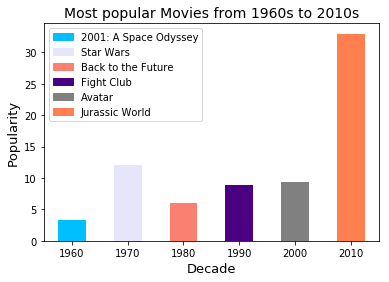

In [133]:
# set the color palette for the plot
colors_palette = ['deepskyblue', 'lavender', 'salmon', 'indigo', 'grey', 'coral']
# map the color with the corresponding movie title
colors = {t: colors_palette[i] for i, t in enumerate(list(decade['title']))} 
decade.plot(kind='bar',x='decades',y='popularity', color =  colors.values());
plt.xticks(rotation='horizontal')
# create the legend of the movie title corresponding decade
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
# set labels and title for the plot
plt.xlabel('Decade',fontsize=13)
plt.ylabel('Popularity',fontsize=13)
plt.title('Most popular Movies from 1960s to 2010s',fontsize=14)
plt.show();

### Research Question 2 (The top 10 most profital movies)

In [135]:
# add a new column in the dataframe named 'profit'
df['profit_adj'] = df['revenue_adj'] - df['budget_adj']
df_copy = df.copy()
# sort the copy of the DataFrame as the decreasing order of the adjusted profit
df_copy.sort_values(by='profit_adj',ascending=False,inplace=True)
# filter the top 10 profital movies 
x = list(df_copy['original_title'][:10])
y = list(df_copy['profit_adj'][:10])


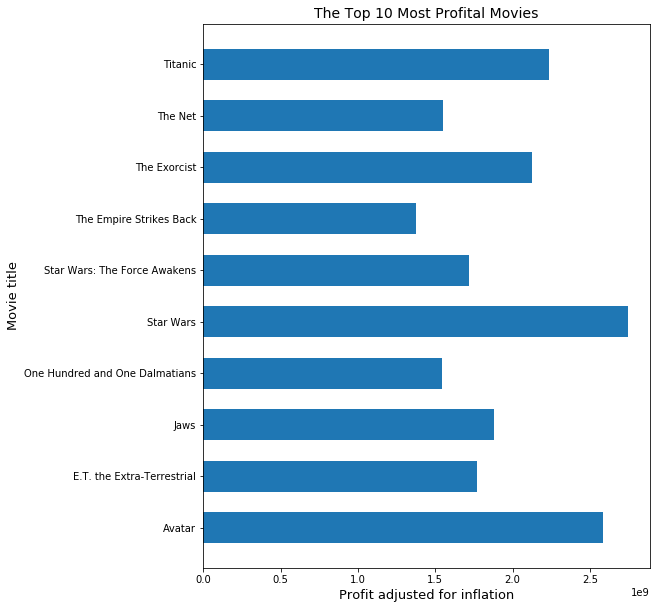

In [138]:
# create a horizontal bar plot of top 10 profital movies
plt.figure(figsize=(8,10))
plt.barh(x, y, height=0.6);
# set labels and title for the plot
plt.xlabel('Profit adjusted for inflation',fontsize=13)
plt.ylabel('Movie title',fontsize=13)
plt.title('The Top 10 Most Profital Movies',fontsize=14);

<a id='conclusions'></a>
## Conclusions

- The most popular movies for each decade have been identified. Unfortunately, we only posess data until 2015. This means thats Jurassic World which has the highest popularity among other movies is from 2010 to 2015.
- The ten most profitable movies are Star Wars, Avatar, Titanic, The Exorcist, Jaws, E.T.the Extra-Terrestrial, Star Wars: The Force Awakens, The Net, One Hundred and One Dalmatians, The Empire Strikes Back.

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## Limitations

- The unit for budjet and revenue is unknow.
- Limited and uncomplete budget information provided. As if making movies is only an american thing. Uh 

In [ ]:
#from subprocess import call
#call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])